In [445]:
import pandas as pd
df =  pd.read_csv("E:\\Courses\\5671-DataMiningBI\\Project\\retail-data-analytics\\merged_datefix_cluster.csv")
df.head()

,Store Cluster,Store,Sales,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,1643690.90,02-05-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,4,16,477409.30,02-05-2010,19.79,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.039,False,B,57197
2,1,31,1469252.05,02-05-2010,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,A,203750
3,1,21,798593.88,02-05-2010,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False,B,140167
4,4,26,1034119.21,02-05-2010,9.55,2.788,NaN,NaN,NaN,NaN,NaN,131.527903,8.488,False,A,152513


In [446]:
grouped = df.groupby(['Store Cluster','Date'],as_index=False).agg({'Sales':'sum',
                                                                   'Temperature':'mean',
                                                                   'Fuel_Price':'mean',
                                                                   'MarkDown1':'mean',
                                                                   'MarkDown2':'mean',
                                                                   'MarkDown3':'mean',
                                                                   'MarkDown4':'mean',
                                                                   'MarkDown5':'mean',
                                                                   'CPI':'mean',
                                                                   'Unemployment':'mean',
                                                                   'Size':'mean'})
grouped.sample(3)

,Store Cluster,Date,Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
435,3,05-14-2010,14363478.46,56.026250,3.031500,NaN,NaN,NaN,NaN,NaN,145.526871,8.342000,196057.375000
52,1,04-12-2013,NaN,62.517778,3.529000,6227.023333,1324.837778,59.123333,1009.2,3128.933333,226.300249,5.777111,174729.222222
560,4,02-04-2011,13554595.21,18.509412,3.148294,NaN,NaN,NaN,NaN,NaN,153.681876,7.892412,120480.764706


In [447]:
holidays = df.loc[:,('Date','IsHoliday')].drop_duplicates()
holidays.sample(10)

,Date,IsHoliday
225,03-12-2010,False
7965,06-28-2013,False
7830,06-07-2013,False
3465,07-29-2011,False
6030,08-31-2012,False
4095,11-04-2011,False
270,03-19-2010,False
7335,03-22-2013,False
6480,11-09-2012,False
7155,02-22-2013,False


In [448]:
final_df = pd.merge(grouped,holidays,on='Date')
final_df['Date']=pd.to_datetime(final_df['Date'],format='%m-%d-%Y')
final_df = final_df.sort_values('Date')
final_df.head(4)

,Store Cluster,Date,Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,IsHoliday
75,1,2010-02-05,12013409.47,40.391111,2.5720,NaN,NaN,NaN,NaN,NaN,212.153476,7.663667,174729.222222,False
79,5,2010-02-05,3948872.24,52.230000,2.9620,NaN,NaN,NaN,NaN,NaN,126.442064,12.361000,87522.000000,False
76,2,2010-02-05,2894486.59,43.951667,2.5675,NaN,NaN,NaN,NaN,NaN,209.933611,8.147833,39356.166667,False
77,3,2010-02-05,16090931.16,31.680000,2.8320,NaN,NaN,NaN,NaN,NaN,145.481606,8.599500,196057.375000,False


In [449]:
#final_df.to_csv("E:\\Courses\\5671-DataMiningBI\\Project\\retail-data-analytics\\cluster_grouped.csv",date_format='%m-%d-%Y',index=False)

In [450]:
final_df=final_df.rename(index=str, columns={"Store Cluster": "StoreCluster"})
stores_group = final_df.groupby('StoreCluster')

In [451]:
stores = []
for i in range(0,5):
        stores.append(stores_group.get_group(i+1))

In [452]:
for i in range(0,5):
    print(stores[i].shape)

(182, 14)
(182, 14)
(182, 14)
(182, 14)
(182, 14)


In [453]:
def fill_CPI_Unemployment(df):
    cpi_mean =  df[df.Date.dt.year == 2013].CPI.mean()
    un_mean =  df[df.Date.dt.year == 2013].Unemployment.mean()
    df.IsHoliday = df.IsHoliday*1
    df.loc[df.CPI.isnull(),'CPI'] = cpi_mean
    df.loc[df.Unemployment.isnull(),'Unemployment'] = un_mean
    return df
def fill_MarkDown(df):    
    df['Week'] = df.Date.dt.week
    weeks = df.groupby('Week',as_index=False).agg({'MarkDown1':'mean','MarkDown2':'mean','MarkDown3':'mean','MarkDown4':'mean','MarkDown5':'mean'}).fillna(0)
    weeks=weeks.rename(index=str, columns={"MarkDown1": "M1","MarkDown2": "M2","MarkDown3": "M3","MarkDown4": "M4","MarkDown5": "M5"})
    temp = pd.merge(df,weeks,on='Week').sort_values('Date')
    temp.loc[temp.MarkDown1.isnull(),'MarkDown1'] = temp[temp.MarkDown1.isnull()].M1
    temp.loc[temp.MarkDown2.isnull(),'MarkDown2'] = temp[temp.MarkDown2.isnull()].M2
    temp.loc[temp.MarkDown3.isnull(),'MarkDown3'] = temp[temp.MarkDown3.isnull()].M3
    temp.loc[temp.MarkDown4.isnull(),'MarkDown4'] = temp[temp.MarkDown4.isnull()].M4
    temp.loc[temp.MarkDown5.isnull(),'MarkDown5'] = temp[temp.MarkDown5.isnull()].M5
    return temp.loc[:,('StoreCluster','Date','Sales','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday')]

In [454]:
for i in range(0,5):
    stores[i] = fill_CPI_Unemployment(stores[i])
    stores[i] = fill_MarkDown(stores[i])

C:\Users\animv\Anaconda3\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\animv\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\animv\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [394]:
for i in range(0,5):
    stores[i].to_csv("E:\\Courses\\5671-DataMiningBI\\Project\\retail-data-analytics\\cluster_"+str(i+1)+".csv",date_format='%m-%d-%Y',index=False)

In [455]:
df = stores[0]

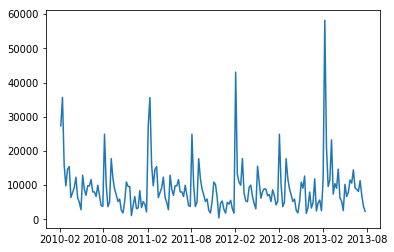

In [379]:
import matplotlib.pyplot as plt
plt.plot(df.Date,df.MarkDown1)
plt.show()

In [380]:
df.loc[:,('Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Sales')]

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Sales
0,2010-02-05,27317.079444,1621.369444,253.898889,22343.290556,6077.971667,12013409.47
4,2010-02-12,35634.295556,2492.126667,222.443889,20396.716667,7184.135556,12127711.50
8,2010-02-19,15954.189444,6904.433333,34.422222,5925.889444,7775.455556,11853406.72
12,2010-02-26,9786.454444,5955.627222,-0.025556,2365.797778,6280.252778,10628081.77
16,2010-03-05,14615.880000,793.308333,7.126875,5182.384444,5011.597222,11361162.15
20,2010-03-12,15425.481111,254.702778,37.650000,3017.017778,6762.680556,10997909.92
24,2010-03-19,6383.178333,245.971111,9.050556,1670.176667,4213.046111,11162429.33
28,2010-03-26,7797.134444,146.915556,298.091667,1693.243333,4150.985000,10280998.95
32,2010-04-02,9244.892222,151.015556,276.548333,647.881528,4586.943889,11912614.81
36,2010-04-09,12330.698889,2467.266111,212.518889,2263.028889,6180.161667,11556942.87


In [382]:
df.loc[df.Date.dt.year == 2011,('Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Sales','Week')]

,Date,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Sales,Week
170,2011-01-07,3440.102778,28338.323889,56.572778,679.503016,5612.631667,10261791.25,NaN
173,2011-01-14,5183.028333,13535.691667,26.101944,539.698333,5772.119444,10098304.05,NaN
176,2011-01-21,4399.732778,2823.062778,26.258333,415.878889,4100.791111,10055989.21,NaN
179,2011-01-28,2155.335556,1215.461667,24.446964,217.370000,5054.923889,9709074.93,NaN
1,2011-02-04,27317.079444,1621.369444,253.898889,22343.290556,6077.971667,11345926.73,NaN
5,2011-02-11,35634.295556,2492.126667,222.443889,20396.716667,7184.135556,11814272.74,NaN
9,2011-02-18,15954.189444,6904.433333,34.422222,5925.889444,7775.455556,12329686.06,NaN
13,2011-02-25,9786.454444,5955.627222,-0.025556,2365.797778,6280.252778,10842248.76,NaN
17,2011-03-04,14615.880000,793.308333,7.126875,5182.384444,5011.597222,11522613.11,NaN
21,2011-03-11,15425.481111,254.702778,37.650000,3017.017778,6762.680556,11112294.07,NaN


In [457]:
df.sample(5)

,StoreCluster,Date,Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
88,1,2010-07-09,11088399.52,80.272222,2.642,9966.143889,1378.997778,593.983333,7178.883333,10310.736111,212.162461,7.502222,0
50,1,2012-04-27,10798563.12,70.030000,3.814,3066.053333,1.544000,11.795556,180.043750,5327.331111,222.730814,6.516778,0
90,1,2012-07-06,12474141.75,83.235556,3.227,8621.435556,148.292222,104.693333,4134.061111,16007.194444,222.997150,6.211778,0
101,1,2011-07-29,10494082.54,89.277778,3.682,3806.840556,392.242778,21.523750,3430.209444,5477.589444,216.551449,7.446222,0
122,1,2010-09-17,10280014.07,81.486667,2.582,8903.654444,15.548000,32.680000,1459.360000,8149.030000,212.574337,7.502222,0


In [459]:
stores[3] = stores[4]

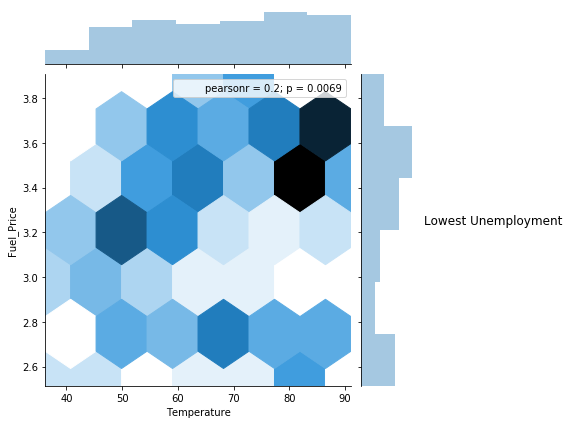

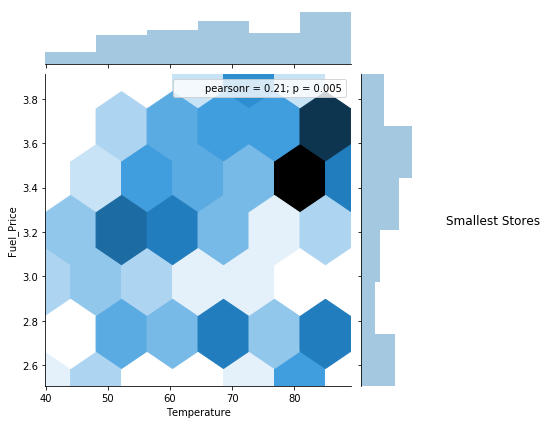

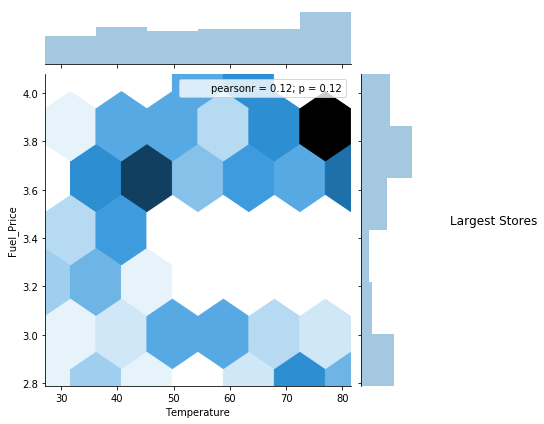

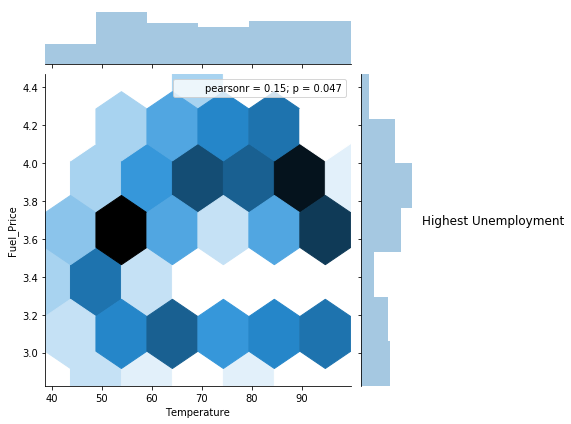

In [471]:
import seaborn as sns

clusters = ['Lowest Unemployment','Smallest Stores','Largest Stores','Highest Unemployment']
for i in range(0,4):
    ax = sns.jointplot(x='Temperature', y='Fuel_Price', data=stores[i],kind='hex',)
    plt.title(clusters[i],x=2.5,y=0.5)
plt.show()

In [461]:
full = stores[0].append(stores[1]).append(stores[2]).append(stores[3])
full.shape

(728, 13)